#### seaborn
- 파이썬의 시각화 라이브러리 중 하나로, matplotlib 라이브러리를 기반으로 하여 좀 더 다양한 시각화 기능과 스타일을 제공 

- seaborn의 특징
    - matplotlib에 비해 더 간결하고 직관적인 API를 제공
    - matplotlib의 스타일을 기본적으로 사용하지만, 좀 더 다양한 스타일을 제공
    - 통계 분석에 사용되는 다양한 그래프를 제공
    - pandas와 연동하여 데이터 시각화를 더욱 편리하게 수행
- seaborn에서 제공하는 그래프
    - relplot: 두 변수 간의 관계를 시각화하는 그래프
    - scatterplot: 산점도 그래프
    - lineplot: 선 그래프
    - histplot: 히스토그램 그래프
    - kdeplot: 밀도 그래프
    - boxplot: 박스 그래프
    - violinplot: 바이올린 그래프
    - heatmap: 히트맵 그래프

In [1]:
import seaborn as sns
import re
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt



tips = sns.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


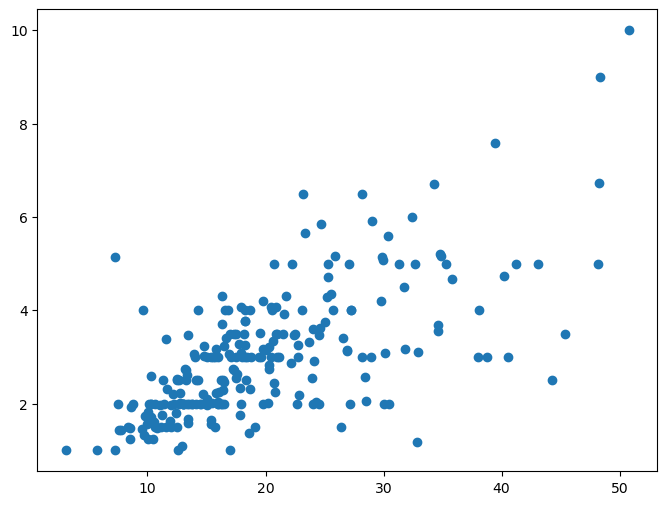

In [2]:
plt.figure(figsize = (8, 6))

plt.scatter(tips['total_bill'], tips['tip'])


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

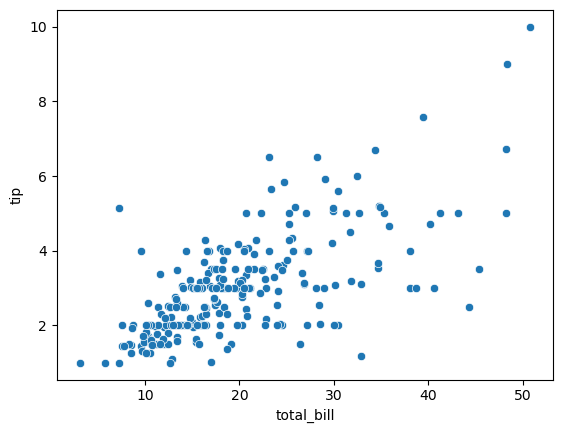

In [3]:
sns.scatterplot(x = tips['total_bill'], y = tips['tip'], data = tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

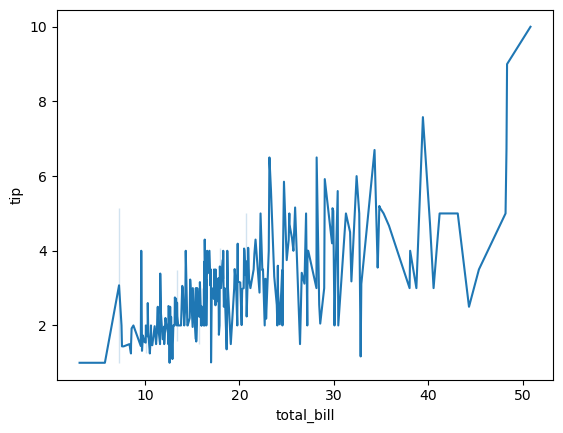

In [4]:
sns.lineplot(data = tips, x = 'total_bill', y = 'tip')

lineplot 함수는 여러 가지 옵션을 제공하며, 이를 사용하여 선 그래프를 더욱 자세하게 설정할 수 있습니다. 
- hue 옵션을 사용하여 'sex' 열의 값에 따라 선 그래프의 색상을 다르게 설정하고, 
- style 옵션을 사용하여 'smoker' 열의 값에 따라 선 그래프의 스타일을 다르게 설정
- markers 옵션을 사용하여 데이터 포인트를 원형 모양으로 표시

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

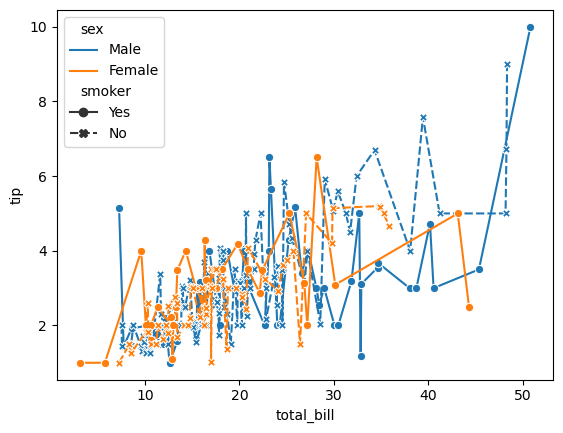

In [5]:
sns.lineplot(x = 'total_bill', y = 'tip', hue = 'sex', style = 'smoker', markers = True, data = tips)

barplot : 범주형 변수에 대한 막대 그래프
- x축에는 "day" 열의 값, y축에는 "total_bill" 열의 값이 사용됨
- barplot 함수는 기본적으로 각 범주별로 y축 값의 평균과 오차 막대를 그리며, 
- ci 옵션을 사용하여 오차 막대의 크기를 조절

<AxesSubplot:xlabel='day', ylabel='total_bill'>

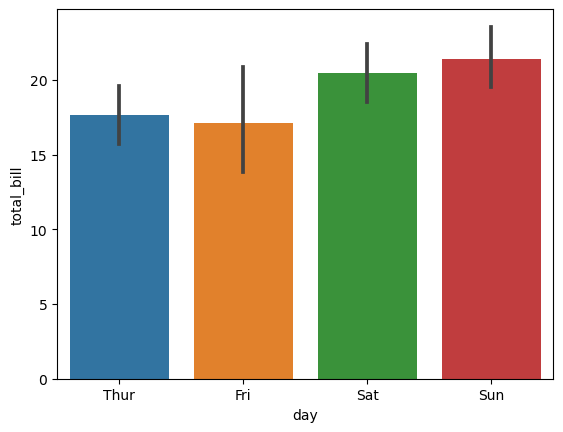

In [6]:
x_data = 'day'
y_data = 'total_bill'

sns.barplot(x = 'day', y  = 'total_bill', data = tips)

C:\Users\james\AppData\Local\Temp\ipykernel_22356\1095774687.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x = 'day', y  = 'total_bill', ci = 'sd', palette = 'Blues_d', data = tips)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

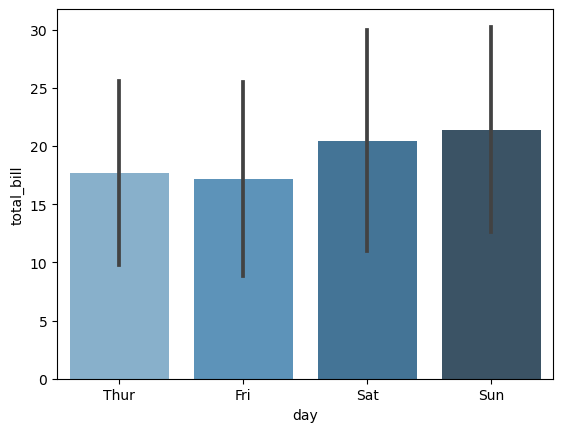

In [7]:
# ci 옵션에 sd 값을 사용 이는 오차 막대의 크기를  y 축의 값의 표준 편차로 설정

sns.barplot(x = 'day', y  = 'total_bill', ci = 'sd', palette = 'Blues_d', data = tips)

In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='day', ylabel='tip_pct'>

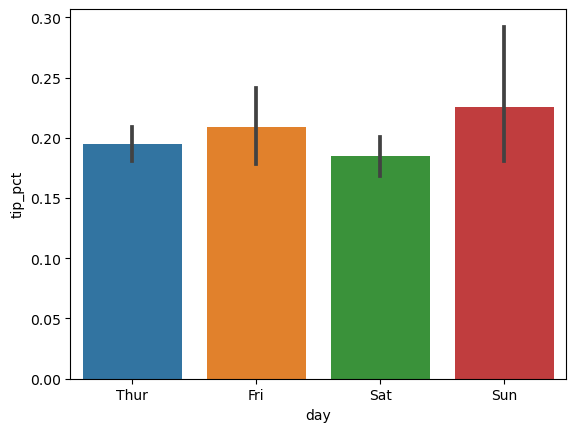

In [9]:
# 팁의 비중을 구해서 tip_pct 요일별 팁의 비중을 보여주는 시각화를 수행하세요

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])


sns.barplot(x = 'day', y  = 'tip_pct', data = tips)

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

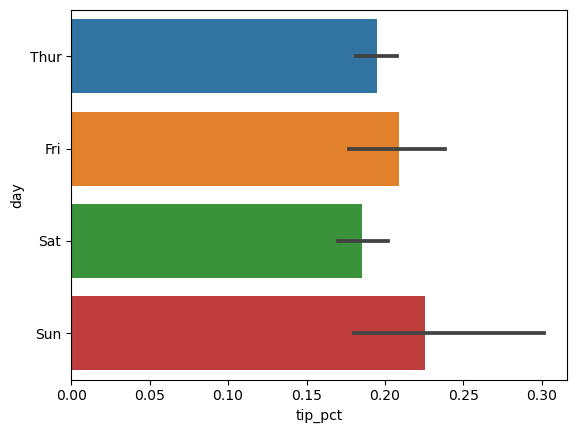

In [10]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])


sns.barplot(x = 'tip_pct', y  = 'day', data = tips, orient = 'h')

<AxesSubplot:xlabel='tip_pct', ylabel='time'>

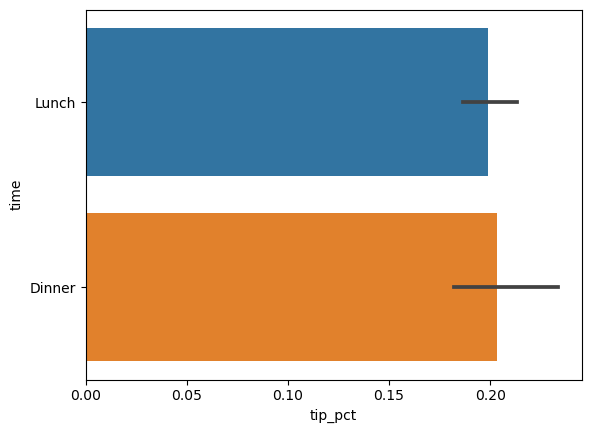

In [11]:
sns.barplot(x = 'tip_pct', y  = 'time', data = tips, orient = 'h')

<AxesSubplot:xlabel='size', ylabel='count'>

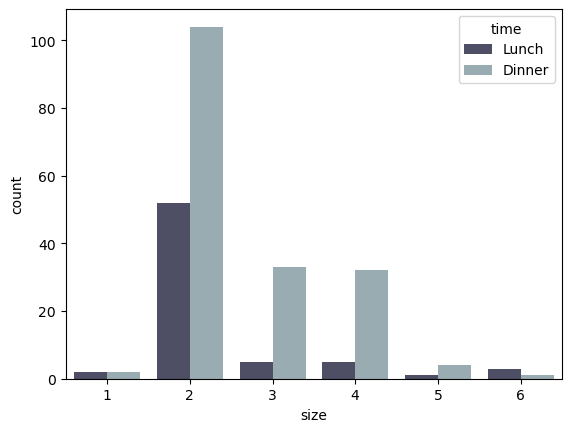

In [12]:
sns.countplot(x = 'size', hue = 'time', data = tips, palette = 'bone')

<AxesSubplot:ylabel='Frequency'>

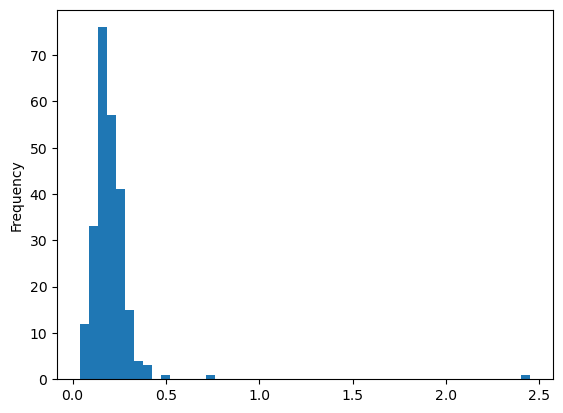

In [13]:
tips['tip_pct'].plot.hist(bins = 50)


<AxesSubplot:xlabel='tip_pct', ylabel='Count'>

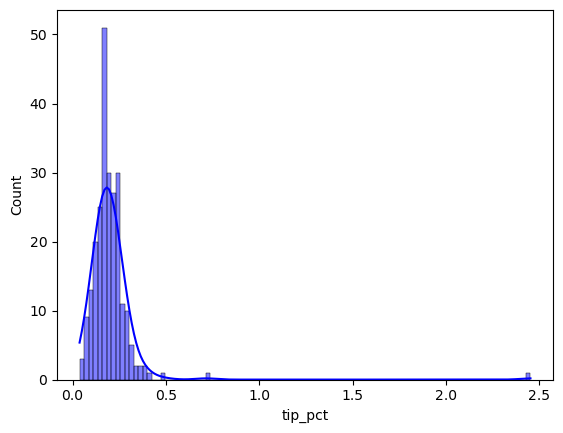

In [14]:
# kde = True 밀도 함수 표시

sns.histplot(tips['tip_pct'], bins = 100, color = 'b', kde = True)

C:\Users\james\AppData\Local\Temp\ipykernel_22356\3893285472.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['tip_pct'], bins = 100, color = 'b', kde = True)


<AxesSubplot:xlabel='tip_pct', ylabel='Density'>

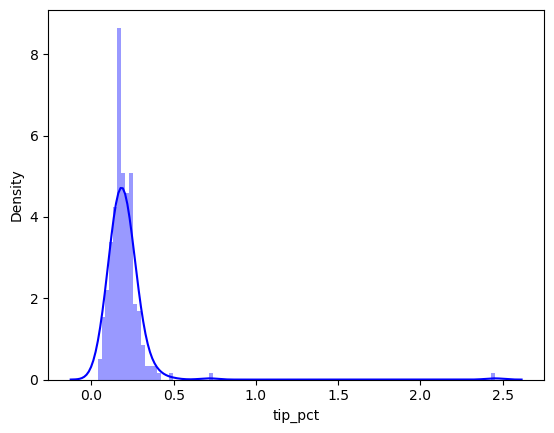

In [15]:
sns.distplot(tips['tip_pct'], bins = 100, color = 'b', kde = True)

<AxesSubplot:xlabel='tip_pct', ylabel='Density'>

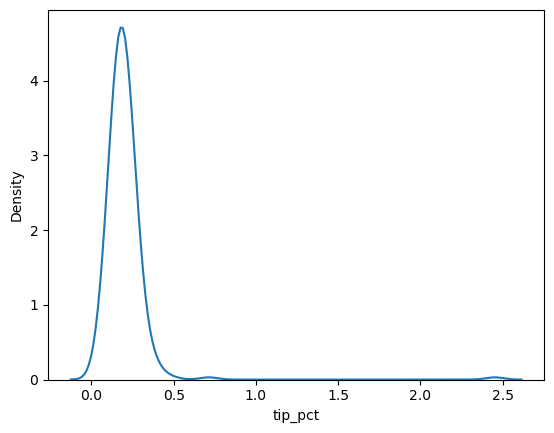

In [16]:
# kdeplot :  확률 밀도 함수를 추정하기 위한 방법중 하나로 커널밀도 

sns.kdeplot(data = tips, x = 'tip_pct')

In [17]:
# !pip install seaborn --upgrade

In [18]:
sns.__version__

'0.12.2'

In [19]:
# 물고기 종류별 몸길이 데이터 

fish_multi = pd.read_csv('../판다스/dataset/dataset_base/4_fm2.csv')

fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<AxesSubplot:xlabel='length', ylabel='Count'>

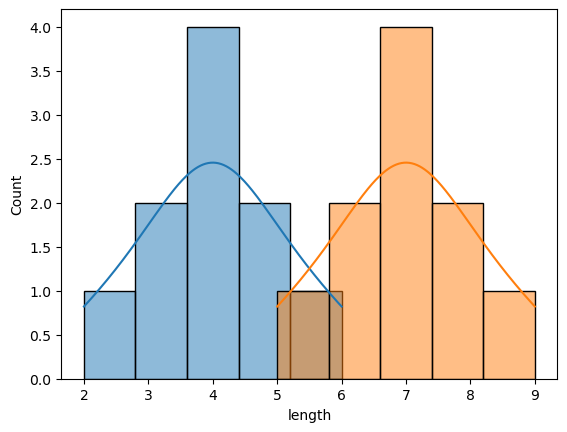

In [20]:
length_a = fish_multi[fish_multi.species == 'A']['length']
length_b= fish_multi[fish_multi.species == 'B']['length']

sns.histplot(length_a, kde = True)
sns.histplot(length_b, kde = True)


<AxesSubplot:xlabel='species', ylabel='length'>

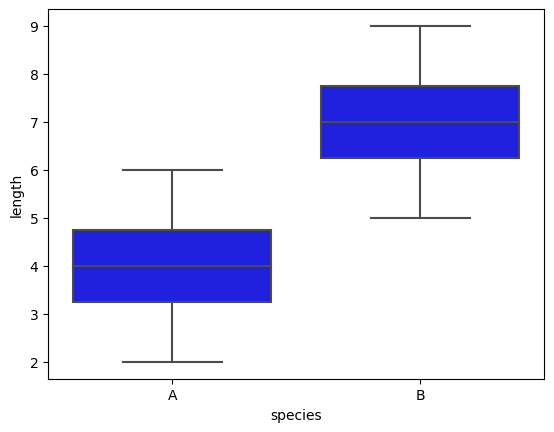

In [21]:
sns.boxplot(x = 'species', y = 'length', data = fish_multi, color = 'b')


<AxesSubplot:xlabel='species', ylabel='length'>

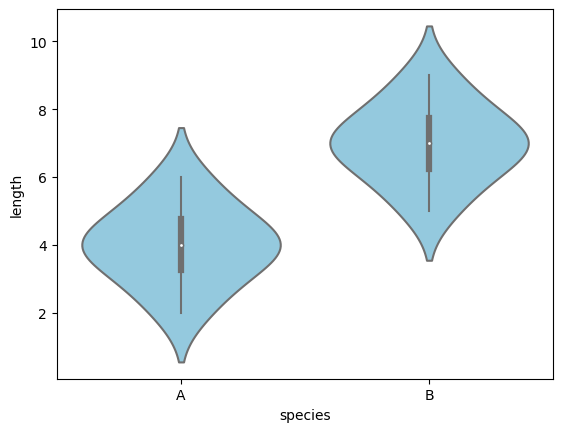

In [22]:
# 바이올린 플롯 : 상자 대신 히스토그램을 세로로 세워서 배치
# 어느 부분에 데이터가 집중되어 있는지 정보를 추가

sns.violinplot(x = 'species', y = 'length', data = fish_multi, color = 'skyblue')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

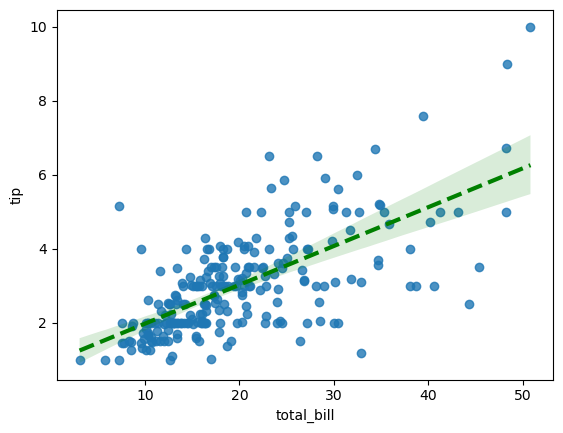

In [23]:
# regplot
# sns.lmplot(data = tips, x = 'total_bill', y = 'tip')

# sns.regplot(data = tips, x = 'total_bill', y = 'tip', scatter_kws = {'s' : 50, 'color' : 'red', 'alpha' : 0.5})
sns.regplot(data = tips, x = 'total_bill', y = 'tip', line_kws = {'color' : 'green', 'linewidth' : 3, 'linestyle': '--'})

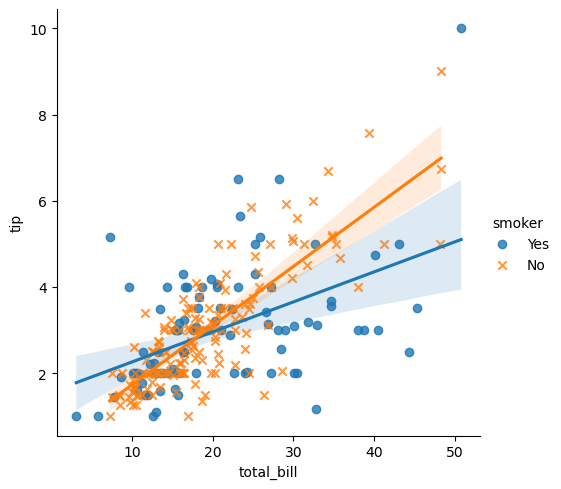

In [24]:
# lmplot : hue 파라미터를 이용 데이ㅓ의 그룹을 구분 미세한 설정을 조정할 수 있다

sns.lmplot(data = tips, x = 'total_bill', y = 'tip', hue = 'smoker', markers = ['o', 'x'])

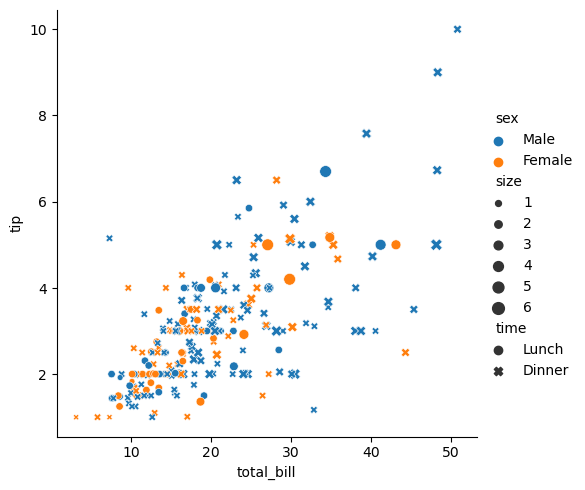

In [25]:
# relplot

sns.relplot(data = tips, x = 'total_bill', y = 'tip', hue = 'sex', style = 'time', size = 'size')

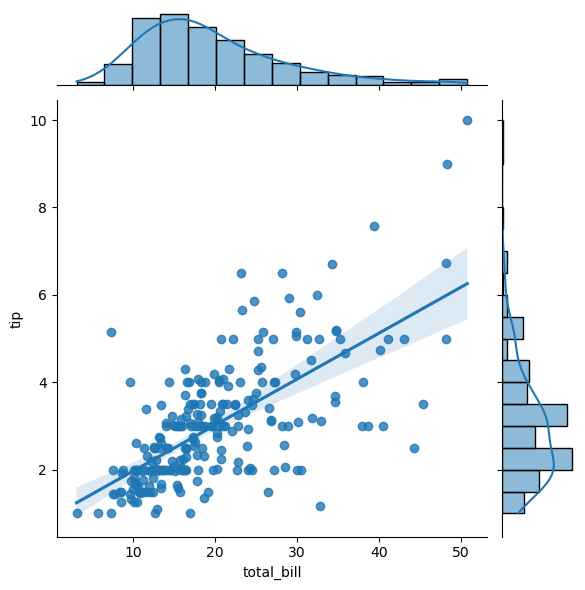

In [26]:
# joinplot

sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'reg')

<AxesSubplot:>

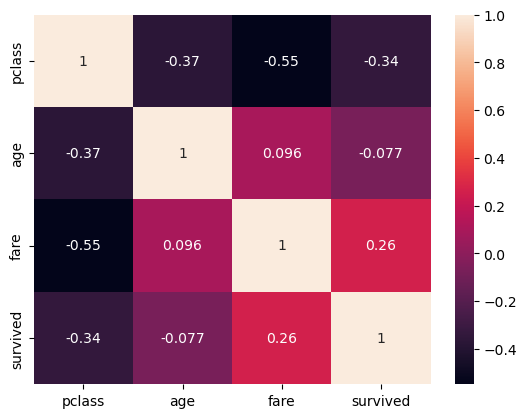

In [27]:
tdf = sns.load_dataset('titanic')

sns.heatmap(tdf[['pclass', 'age', 'fare', 'survived']].corr(), annot = True)

In [28]:
table = tdf.pivot_table(index = ['sex'], columns = ['class'], values = ['survived'], aggfunc = 'mean')

table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

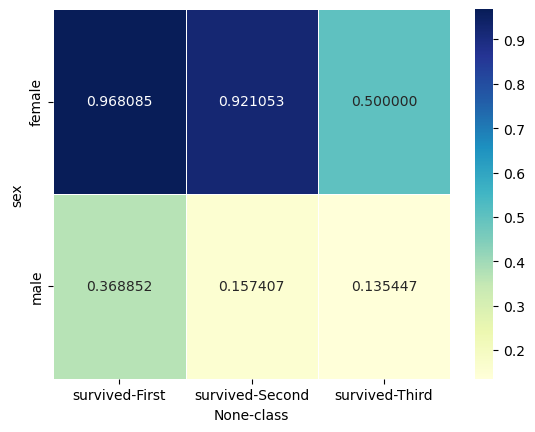

In [29]:
sns.heatmap(table, annot = True, fmt = 'f', cmap = 'YlGnBu', linewidth = .5, cbar = True)

D:\python\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
D:\python\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
D:\python\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
D:\python\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
D:\python\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
D:\python\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
D:\python\lib\site-pac

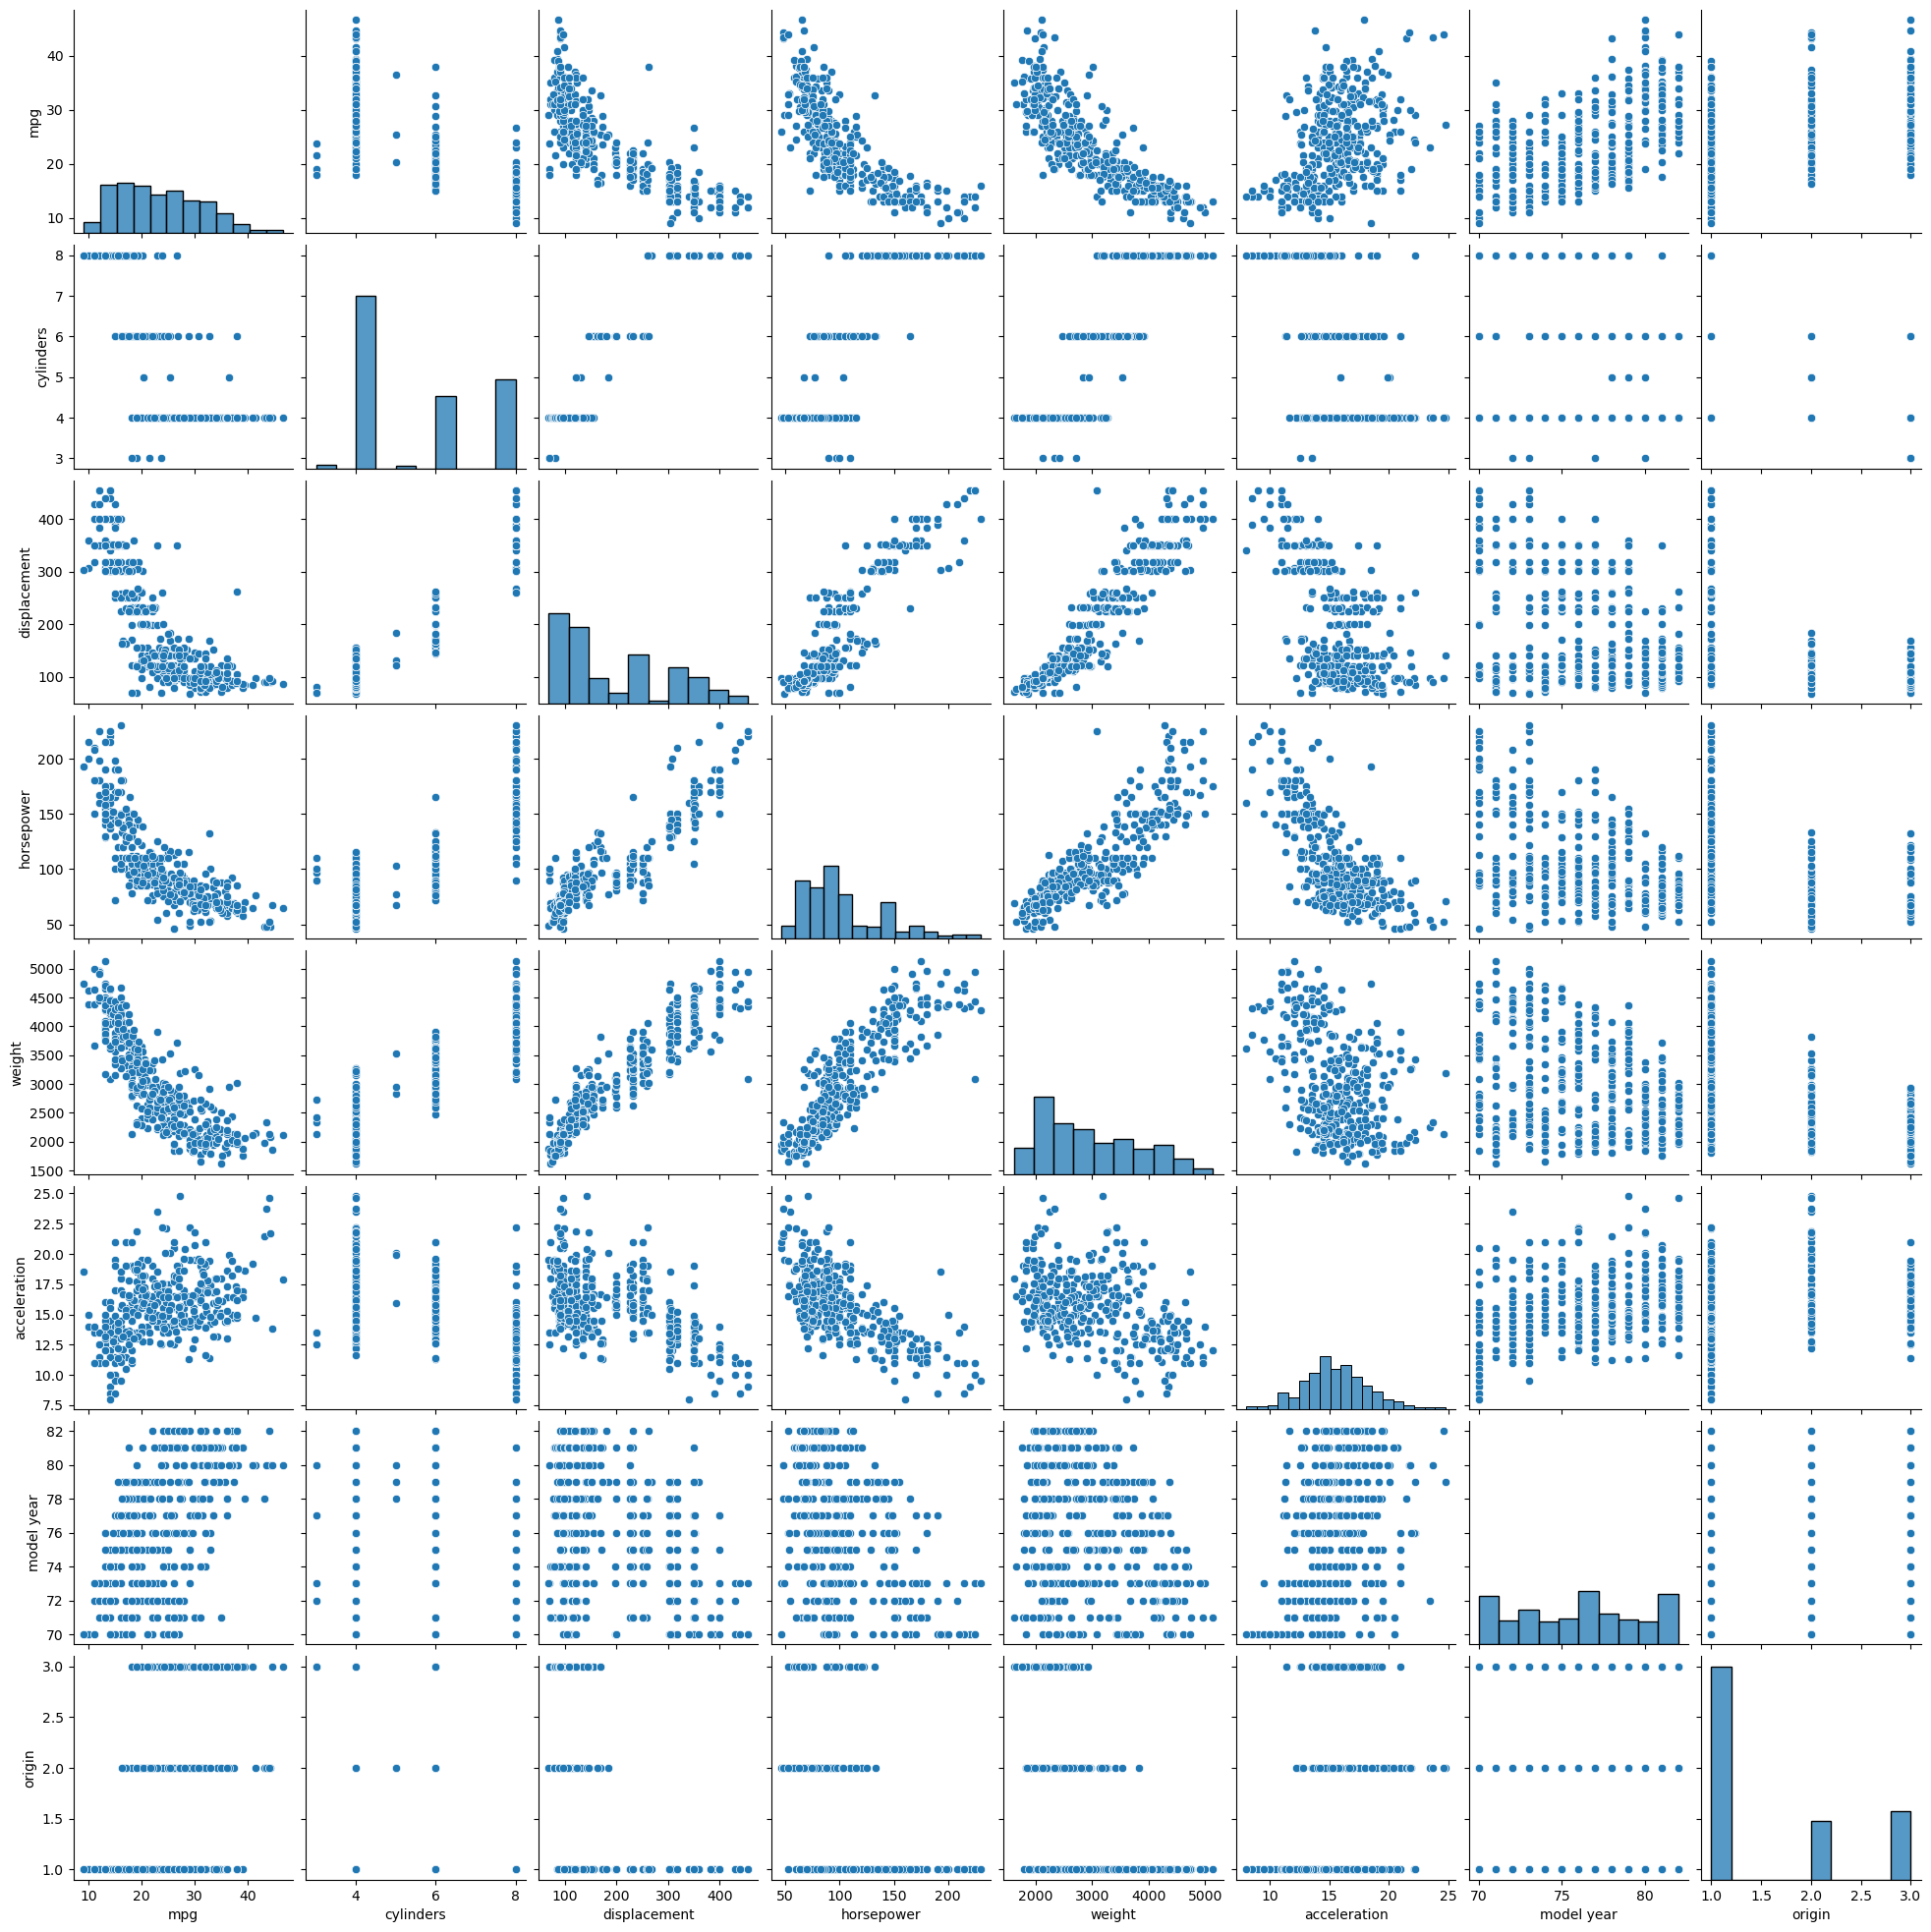

In [30]:
df_auto = pd.read_pickle('../판다스/dataset/dataset_base/auto-mpg.pkl')

df_auto.head()


sns.pairplot(df_auto, palette = 'gray')

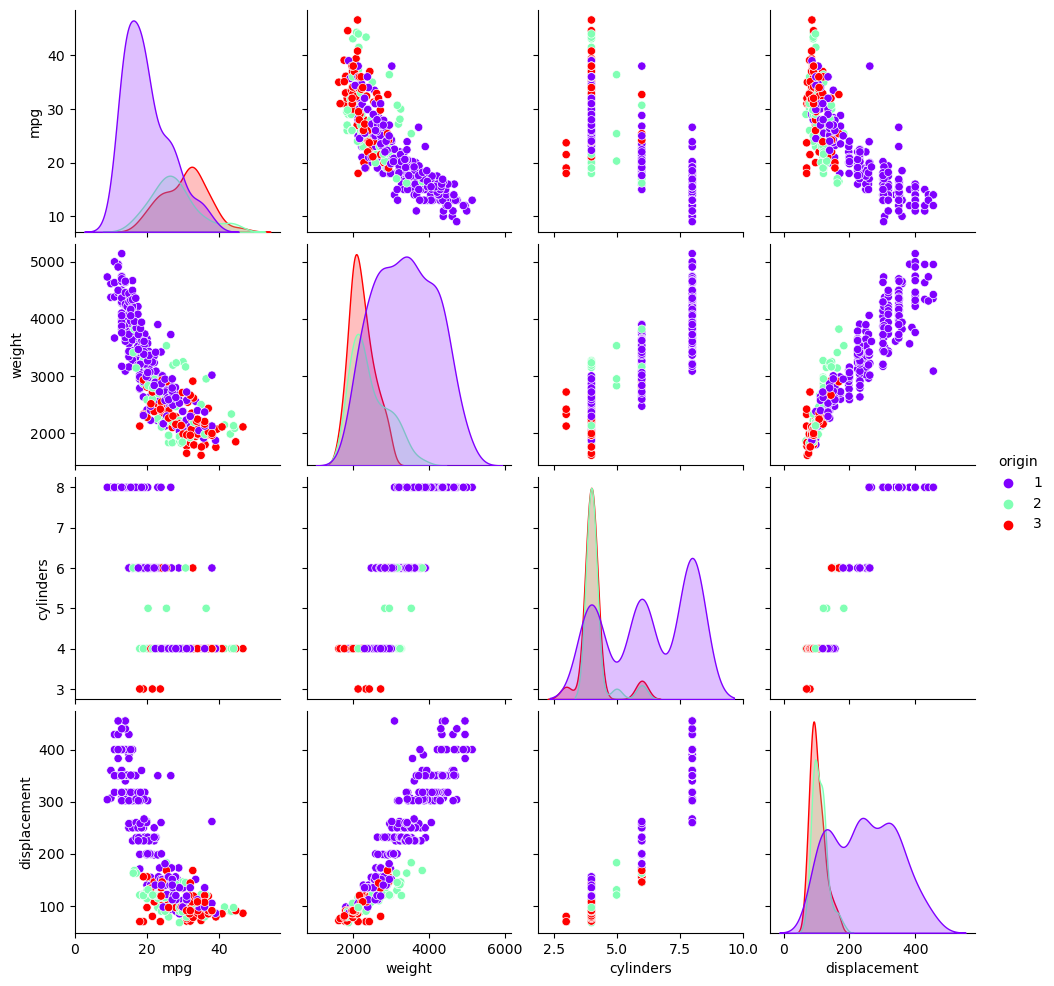

In [31]:
dfa = df_auto[['mpg','weight','cylinders','displacement','origin']]
sns.pairplot(dfa,hue='origin',palette='rainbow')

In [32]:
# 과제 : 1. seaborn 그래프의 각 유형을 적요하기에 적합한 케이스를 설정해서 각 그래프를 이용해서 시각화 하세요
# 2. 과제 1의 경우를 메타플립 또는 판다스 시각화 툴을 이용해서 시각화 

- seaborn에서 제공하는 그래프
    - relplot: 두 변수 간의 관계를 시각화하는 그래프
    - scatterplot: 산점도 그래프
    - lineplot: 선 그래프
    - histplot: 히스토그램 그래프
    - kdeplot: 밀도 그래프
    - boxplot: 박스 그래프
    - violinplot: 바이올린 그래프
    - heatmap: 히트맵 그래프

In [33]:
df_auto = sns.load_dataset('titanic')

df_auto

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Figure size 1000x600 with 0 Axes>

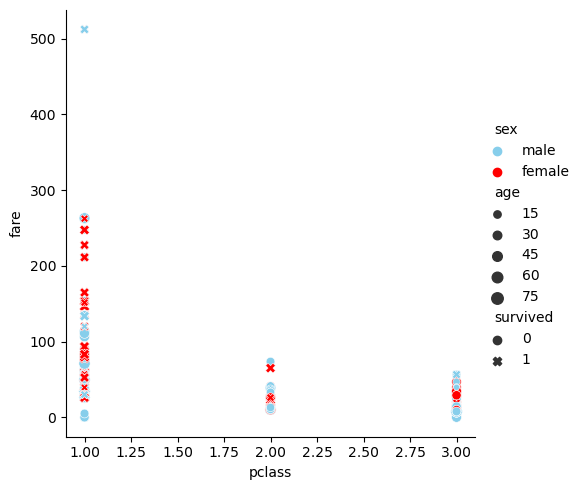

In [34]:
# relplot

plt.figure(figsize = (10, 6))
sns.relplot(data = df_auto, x = 'pclass', y = 'fare', hue = 'sex', style = 'survived', size = 'age', palette={"male": "skyblue", "female": "red"})

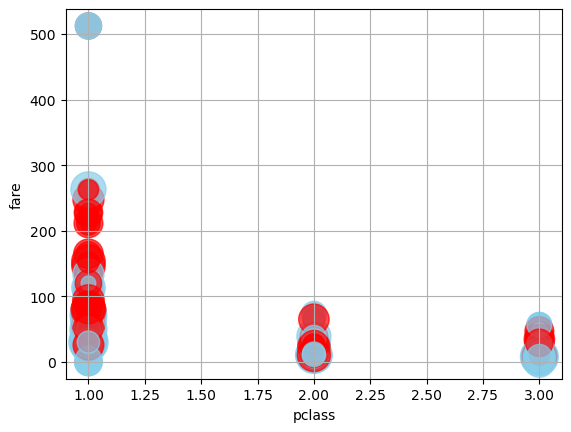

In [35]:
fig, ax = plt.subplots()
ax.scatter(df_auto['pclass'], df_auto['fare'], c=df_auto['sex'].map({"male": "skyblue", "female": "red"}), marker='o', alpha=0.7, s=df_auto['age']*10, cmap='viridis')
ax.set_xlabel('pclass')
ax.set_ylabel('fare')
ax.grid(True)
plt.show()

<AxesSubplot:xlabel='fare', ylabel='pclass'>

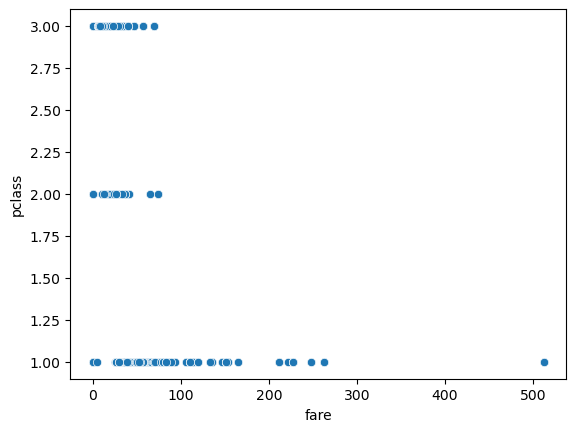

In [36]:
# scartterplot

sns.scatterplot(data = df_auto, x = 'fare', y = 'pclass')

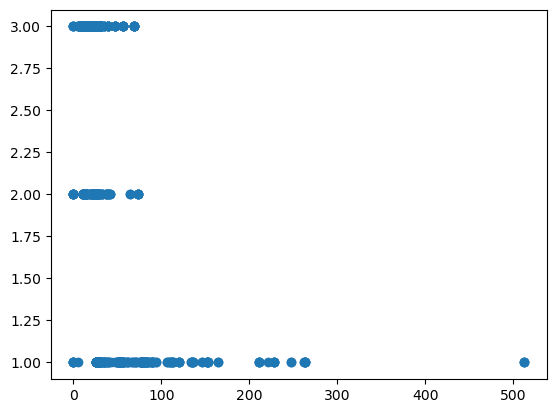

In [37]:
plt.scatter(df_auto['fare'], df_auto['pclass'])

In [38]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


<AxesSubplot:>

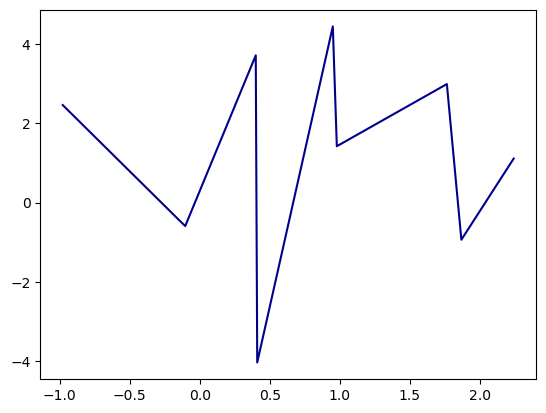

In [39]:
# lineplot

np.random.seed(0)
x1 = np.random.randn(10)

y1 = np.random.randn(10) * 3 - np.random.randn(10)

sns.lineplot(x = x1 , y = y1, color = 'darkblue')

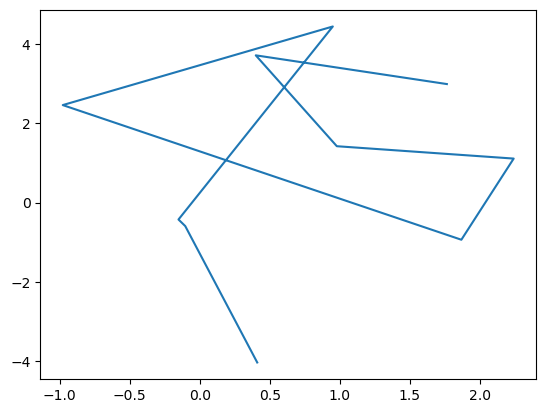

In [40]:
plt.plot(x1, y1)

<AxesSubplot:xlabel='tip_r', ylabel='Count'>

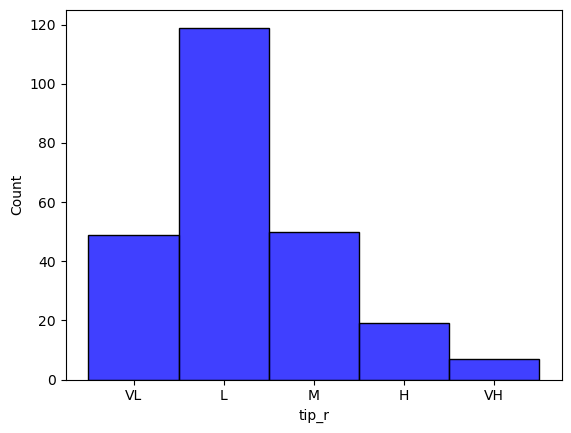

In [41]:
# histplot

tips['tip_r'] = pd.cut(tips['total_bill'], 5, labels = ['VL', 'L', 'M', 'H', 'VH'])

sns.histplot(data = tips, x = 'tip_r', bins = 100, color = 'b')

(array([119.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  49.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  50.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  19.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          7.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
        1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
        1.76, 1.8 , 1.

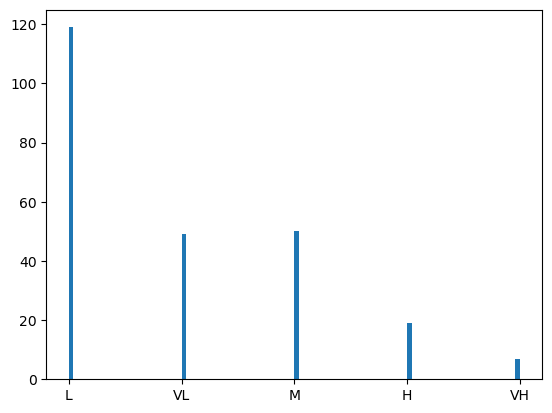

In [42]:
plt.hist(tips['tip_r'], bins = 100)

<AxesSubplot:xlabel='size', ylabel='Density'>

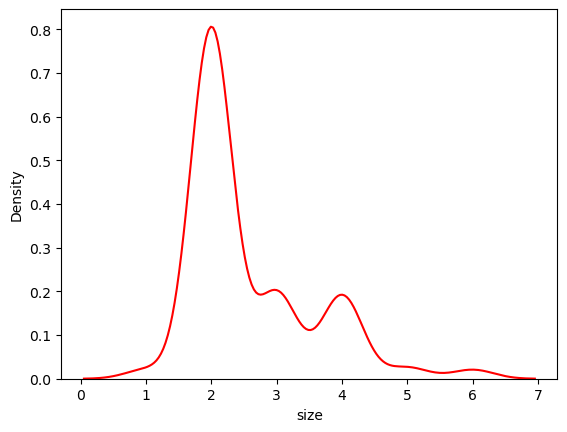

In [43]:
# kdeplot

sns.kdeplot(data = tips, x = 'size', color = 'red')

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

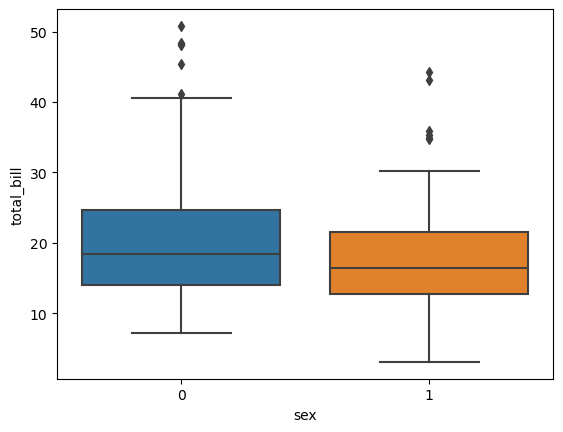

In [44]:
# boxplot
tips['sex'].replace({'Male' : 0, 'Female' : 1}, inplace = True) 

tips.head()

sns.boxplot(data = tips, x = 'sex', y = 'total_bill')

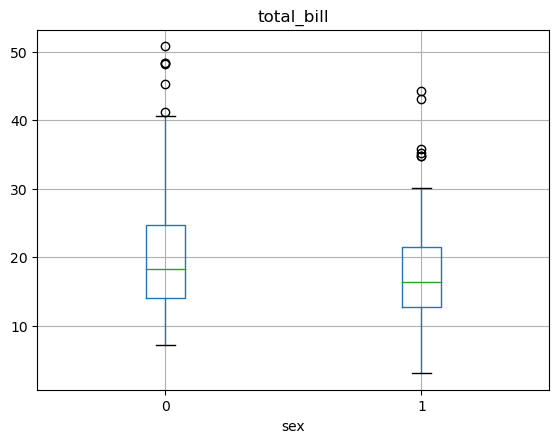

In [53]:
tips['sex'].replace({'Male': 0, 'Female': 1}, inplace=True)



tips.boxplot(column='total_bill', by='sex')

ax.set_xlabel('Sex')
ax.set_ylabel('Total Bill')
ax.set_title('')
plt.suptitle('')
plt.show()

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

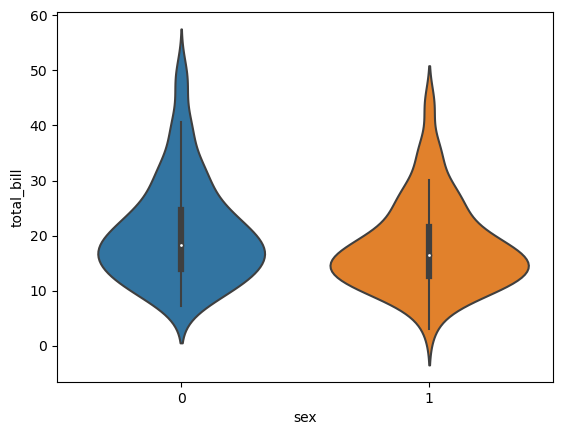

In [46]:
# violinplot

sns.violinplot(data = tips, x = 'sex', y = 'total_bill')

<AxesSubplot:>

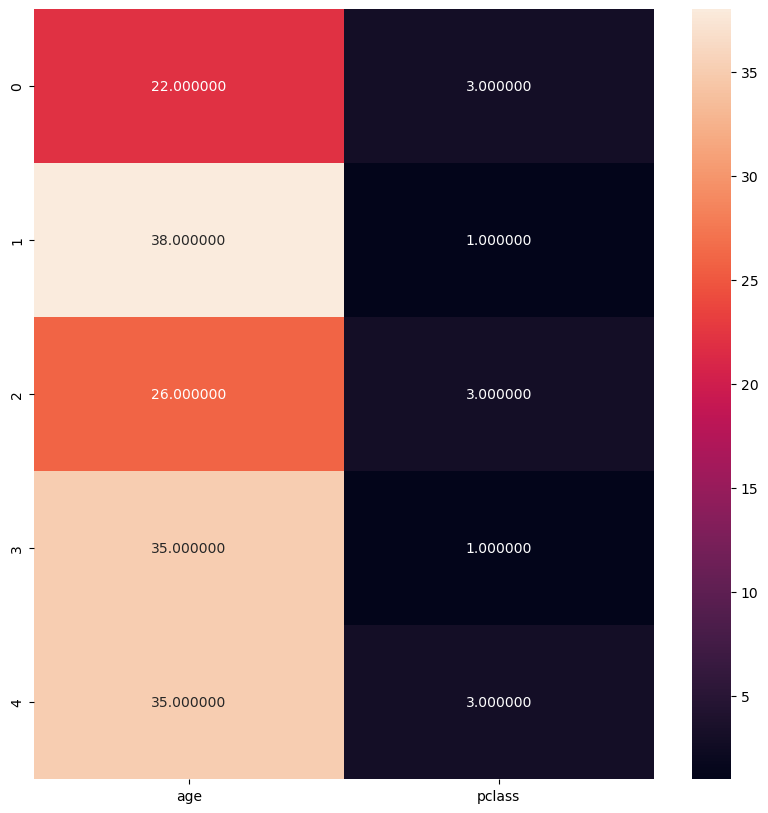

In [47]:
# heatmapplot

plt.figure(figsize = (10, 10))
# table = tips.pivot_table(index = ['total_bill'], columns = ['smoker'], values = ['tip'], aggfunc = 'mean')


sns.heatmap(tdf[['age', 'pclass']].head(), annot = True, fmt = 'f', cbar = True)